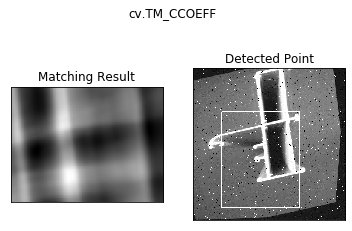

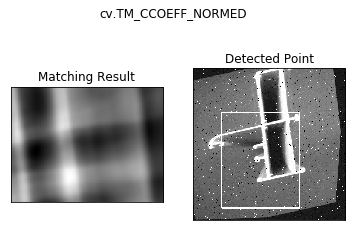

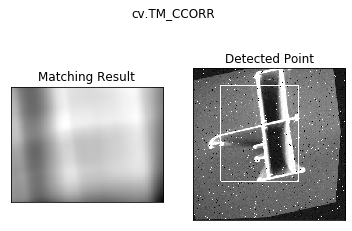

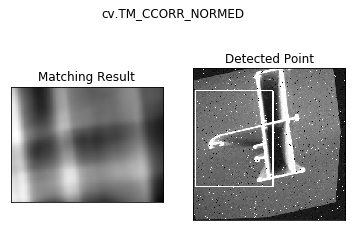

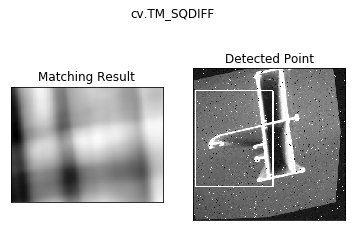

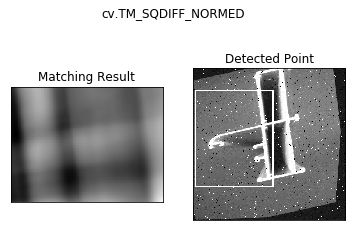

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('img_simi/1.jpg',0)
img2 = img.copy()
template = cv.imread('img_simi/4.png',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
i=0
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    cv.imwrite("img_simi/img"+str(i)+".jpg",img)
    i=i+1
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [ ]:
# Python program to illustrate
# template matching
import cv2
import numpy as np

# Read the main image
img_rgb = cv2.imread('img_simi/5.jpg',1)

# Convert it to grayscale
img_gray =cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Read the template
template = cv2.imread('img_simi/4.png',0)

# Store width and height of template in w and h
w, h = template.shape[::-1]

# Perform match operations.
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)

# Specify a threshold
threshold = 0.3

# Store the coordinates of matched area in a numpy array
loc = np.where( res >= threshold)

# Draw a rectangle around the matched region.
for pt in zip(*loc[::-1]):
	cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 2)

# Show the final image with the matched area.
cv2.imshow('Detected',img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
import cv2
import numpy as np

img_rgb = cv2.imread('img_simi/1.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread('img_simi/4.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.3
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

cv2.imshow('Detected',img_rgb)